1. Importing Libraries

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.19.0


In [4]:
# importing other libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aakash50897/churn-modellingcsv")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'churn-modellingcsv' dataset.
Path to dataset files: /kaggle/input/churn-modellingcsv


In [8]:
data = pd.read_csv('/kaggle/input/churn-modellingcsv/Churn_Modelling.csv')

In [9]:
data.shape

(10000, 14)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
#Splitting into dependent and independent features

X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [12]:
Geography = pd.get_dummies(X['Geography'],dtype = np.int8)
Gender = pd.get_dummies(X['Gender'],dtype = np.int8)

In [13]:
X = X.drop(['Geography','Gender'],axis=1)

In [14]:
X = pd.concat([X,Geography,Gender],axis = 1)

In [15]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


2. Train test split

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [17]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
9254,686,32,6,0.00,2,1,1,179093.26,1,0,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,0,1,0,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,0,1,0,1
6087,561,27,9,135637.00,1,1,0,153080.40,1,0,0,1,0
6669,517,56,9,142147.32,1,0,0,39488.04,1,0,0,0,1


3. Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [19]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ..., -0.57638802,
        -0.91324755,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ...,  1.73494238,
        -0.91324755,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57638802,
         1.09499335, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57638802,
        -0.91324755,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ..., -0.57638802,
        -0.91324755,  0.91324755]])

In [20]:
X_test

array([[-5.12501721e-01, -6.77299309e-01, -6.98445493e-01, ...,
        -5.63491843e-01, -9.09111664e-01,  9.09111664e-01],
       [-2.36046598e-01,  3.84298354e-01, -1.38035469e+00, ...,
        -5.63491843e-01, -9.09111664e-01,  9.09111664e-01],
       [-4.61306328e-01,  4.80807232e-01, -3.57490896e-01, ...,
         1.77464858e+00,  1.09997489e+00, -1.09997489e+00],
       ...,
       [ 8.59534812e-01,  7.70333868e-01,  6.65372897e-01, ...,
        -5.63491843e-01,  1.09997489e+00, -1.09997489e+00],
       [ 4.70449825e-01, -9.66825944e-01, -3.57490896e-01, ...,
        -5.63491843e-01, -9.09111664e-01,  9.09111664e-01],
       [-1.84851205e-01, -1.73715981e-03, -1.38035469e+00, ...,
        -5.63491843e-01, -9.09111664e-01,  9.09111664e-01]])

In [21]:
X_train.shape

(8000, 13)

In [22]:
y_train.shape

(8000,)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU,ELU
from tensorflow.keras.layers import Dropout

4. Building ANN

In [49]:
classifier = Sequential()

In [50]:
# Adding the input layer

classifier.add(Dense(units = 13,activation = 'relu'))

In [51]:
## Adding first hidden layer
classifier.add(Dense(units = 6,activation = 'relu'))

In [52]:
classifier.add(Dense(units = 7, activation = 'relu'))

In [53]:
classifier.add(Dense(units = 1,activation = 'sigmoid'))

In [54]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [56]:
early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [57]:
model_history = classifier.fit(X_train,y_train,validation_split = 0.33,batch_size = 10,epochs = 1000,callbacks = early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7401 - loss: 0.5461 - val_accuracy: 0.7910 - val_loss: 0.4547
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7938 - loss: 0.4330 - val_accuracy: 0.7997 - val_loss: 0.4338
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8166 - loss: 0.4073 - val_accuracy: 0.8338 - val_loss: 0.4078
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8425 - loss: 0.3911 - val_accuracy: 0.8395 - val_loss: 0.3882
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8536 - loss: 0.3628 - val_accuracy: 0.8410 - val_loss: 0.3764
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8608 - loss: 0.3463 - val_accuracy: 0.8466 - val_loss: 0.3694
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8647 - loss: 0.3385 - val_accuracy: 0.8470 - val_loss: 0.3721
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8602 - loss: 0.3464 - 

In [58]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

5. Plotting accuracy and loss

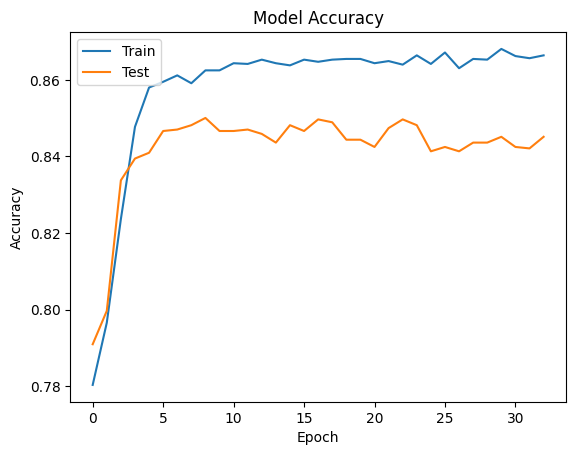

In [59]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc = 'upper left')
plt.show()

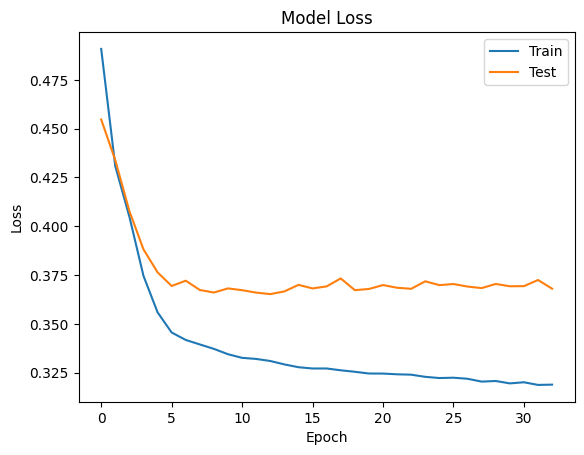

In [61]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc = 'upper right')
plt.show()